In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/test.csv')

D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv', index_col = 0).T.to_dict()
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv', index_col = 0).T.to_dict()
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv', index_col = 0).T.to_dict()

In [46]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [47]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [48]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 54)
(46404, 53)


## 속성 코드 이해하기 D, H, L

### D 코드

In [49]:
대분류 = []
소분류 = []
세분류 = []
중분류 = []

for i in D_code.keys():
    대분류.append(D_code[i]['속성 D 대분류코드'])
    소분류.append(D_code[i]['속성 D 소분류코드'])
    중분류.append(D_code[i]['속성 D 중분류코드'])
    세분류.append(D_code[i]['속성 D 세분류코드'])

In [50]:
print('D_code의 key 개수',len(D_code.keys()))
print('D_code의 value 개수', len(D_code.values())*4)
print('D_code의 대분류 개수', len(set(대분류)))
print('D_code의 중분류 개수', len(set(중분류)))
print('D_code의 소분류 개수', len(set(소분류)))
print('D_code의 세분류 개수', len(set(세분류)))

D_code의 key 개수 1114
D_code의 value 개수 4456
D_code의 대분류 개수 11
D_code의 중분류 개수 36
D_code의 소분류 개수 137
D_code의 세분류 개수 451


In [59]:
대분류_개수 = {i:0 for i in set(대분류)}
중분류_개수 = {i:0 for i in set(중분류)}
소분류_개수 = {i:0 for i in set(소분류)}
세분류_개수 = {i:0 for i in set(세분류)}
for i in 대분류:
    대분류_개수[i] += 1

for i in 중분류:
    중분류_개수[i] += 1

for i in 소분류:
    소분류_개수[i] += 1

for i in 세분류:
    세분류_개수[i] += 1

In [60]:
대분류_개수

{1: 194,
 216: 141,
 377: 91,
 482: 36,
 522: 87,
 618: 110,
 744: 110,
 864: 57,
 926: 269,
 1235: 18,
 1258: 1}

In [61]:
중분류_개수

{2: 47,
 56: 124,
 189: 23,
 217: 2,
 220: 8,
 231: 39,
 274: 22,
 297: 70,
 378: 56,
 439: 9,
 450: 19,
 473: 3,
 477: 4,
 482: 36,
 523: 73,
 603: 14,
 619: 22,
 644: 12,
 659: 28,
 690: 16,
 708: 7,
 716: 25,
 745: 74,
 824: 36,
 864: 57,
 927: 67,
 1000: 46,
 1053: 36,
 1093: 8,
 1104: 29,
 1137: 27,
 1169: 20,
 1193: 28,
 1227: 8,
 1235: 18,
 1258: 1}

In [62]:
소분류_개수

{3: 2,
 6: 9,
 16: 12,
 29: 7,
 37: 5,
 43: 12,
 57: 1,
 58: 4,
 63: 8,
 72: 10,
 83: 7,
 91: 17,
 109: 13,
 123: 28,
 152: 36,
 190: 6,
 197: 12,
 210: 5,
 217: 2,
 221: 2,
 224: 6,
 232: 5,
 238: 4,
 242: 15,
 258: 11,
 270: 3,
 273: 1,
 274: 22,
 298: 13,
 312: 2,
 315: 16,
 332: 7,
 340: 12,
 353: 2,
 356: 2,
 359: 8,
 368: 8,
 379: 2,
 382: 13,
 396: 1,
 397: 33,
 431: 7,
 440: 5,
 446: 4,
 451: 11,
 463: 6,
 470: 2,
 473: 3,
 477: 4,
 483: 4,
 488: 1,
 489: 1,
 490: 4,
 494: 1,
 495: 13,
 509: 12,
 524: 12,
 537: 3,
 540: 6,
 547: 12,
 560: 25,
 586: 13,
 600: 2,
 603: 14,
 620: 15,
 636: 7,
 645: 6,
 652: 2,
 655: 1,
 656: 3,
 660: 16,
 677: 12,
 691: 11,
 703: 5,
 708: 7,
 717: 17,
 735: 8,
 746: 1,
 747: 27,
 775: 7,
 782: 1,
 783: 26,
 810: 4,
 815: 8,
 825: 5,
 831: 15,
 847: 6,
 853: 10,
 865: 18,
 884: 16,
 901: 7,
 909: 6,
 915: 7,
 923: 3,
 928: 22,
 951: 9,
 961: 20,
 982: 3,
 985: 3,
 988: 7,
 996: 3,
 1001: 6,
 1008: 8,
 1017: 8,
 1026: 9,
 1036: 5,
 1042: 10,
 1054: 

In [63]:
세분류_개수

{4: 1,
 5: 1,
 7: 1,
 8: 6,
 14: 1,
 15: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 5,
 30: 3,
 33: 1,
 34: 3,
 38: 3,
 41: 1,
 42: 1,
 44: 1,
 45: 1,
 46: 7,
 53: 3,
 57: 1,
 59: 1,
 60: 3,
 64: 1,
 65: 1,
 66: 3,
 69: 3,
 73: 3,
 76: 1,
 77: 3,
 80: 3,
 84: 1,
 85: 1,
 86: 1,
 87: 3,
 90: 1,
 92: 5,
 97: 4,
 101: 7,
 108: 1,
 110: 4,
 114: 9,
 124: 7,
 131: 5,
 136: 9,
 145: 7,
 153: 6,
 159: 12,
 171: 3,
 174: 1,
 175: 7,
 182: 7,
 191: 1,
 192: 1,
 193: 1,
 194: 1,
 195: 1,
 196: 1,
 198: 1,
 199: 1,
 200: 1,
 201: 4,
 205: 4,
 209: 1,
 211: 1,
 212: 4,
 218: 1,
 219: 1,
 222: 1,
 223: 1,
 225: 4,
 229: 1,
 230: 1,
 233: 1,
 234: 4,
 238: 4,
 243: 3,
 246: 8,
 254: 3,
 257: 1,
 259: 4,
 263: 1,
 264: 4,
 268: 1,
 269: 1,
 270: 3,
 273: 1,
 275: 1,
 276: 7,
 283: 6,
 289: 1,
 290: 3,
 293: 3,
 296: 1,
 299: 11,
 310: 1,
 311: 1,
 313: 1,
 314: 1,
 316: 8,
 324: 7,
 331: 1,
 333: 6,
 339: 1,
 341: 3,
 344: 1,
 345: 6,
 351: 1,
 352: 1,
 354: 1,
 355: 1,
 357: 1,


Text(0.5, 1.0, 'person_prefer_d_1_l by target')

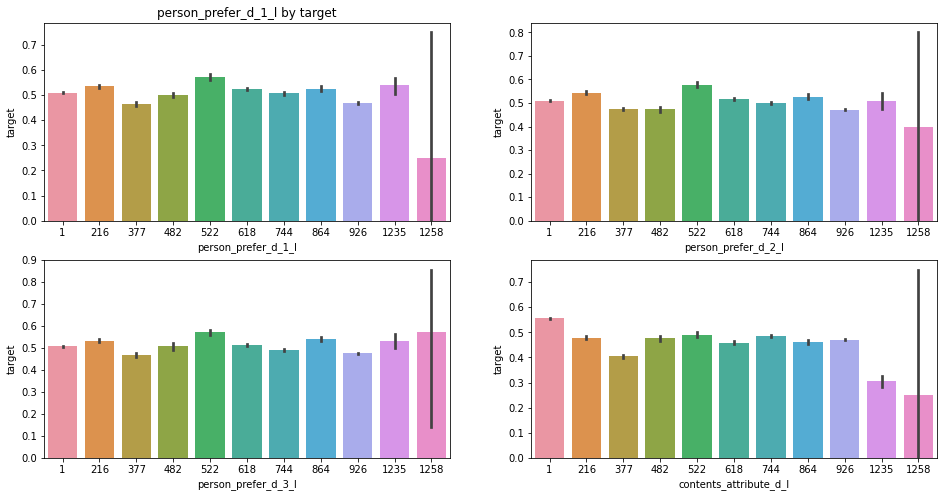

In [75]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train, x = 'person_prefer_d_1_l', y = 'target', ax = ax[0,0])
sns.barplot(data = train, x = 'person_prefer_d_2_l', y = 'target',ax = ax[0,1])
sns.barplot(data = train, x = 'person_prefer_d_3_l',y = 'target', ax = ax[1,0])
sns.barplot(data = train, x = 'contents_attribute_d_l', y = 'target',ax = ax[1,1])

ax[0,0].set_title('person_prefer_d_1_l by target')

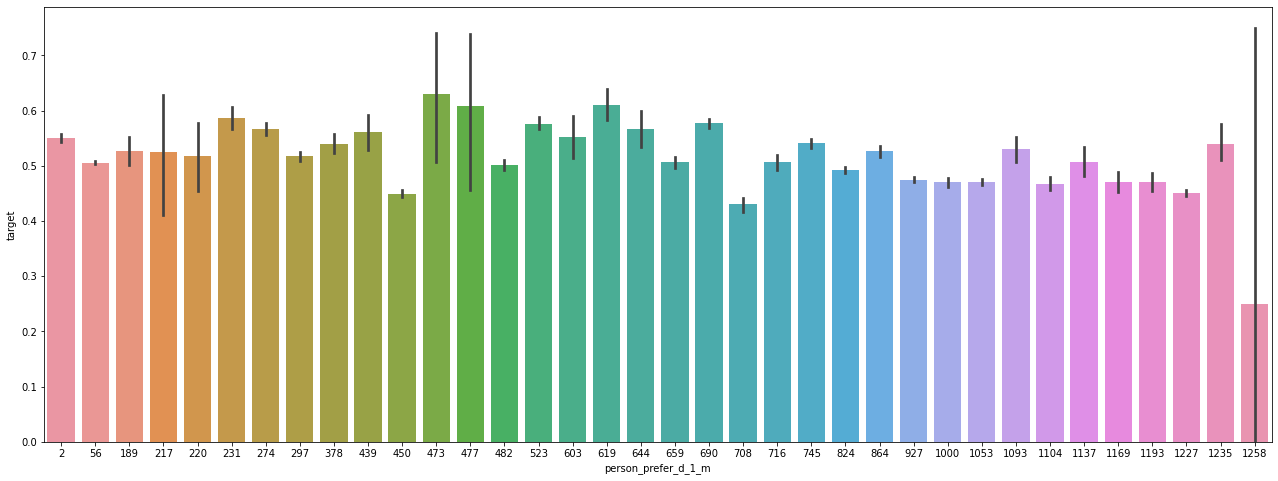

In [80]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_1_m', y = 'target')

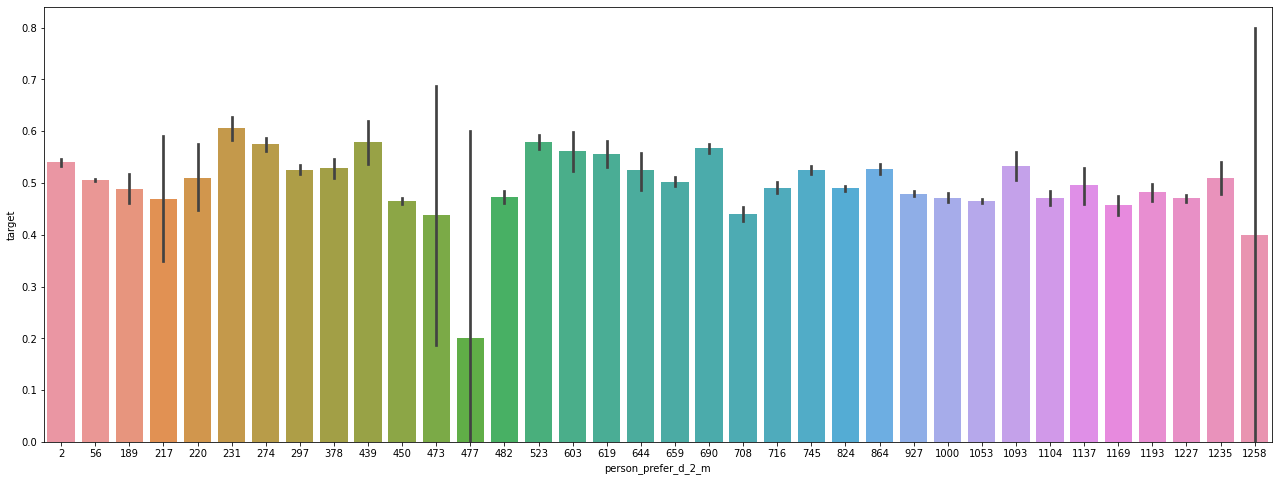

In [81]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_2_m', y = 'target')

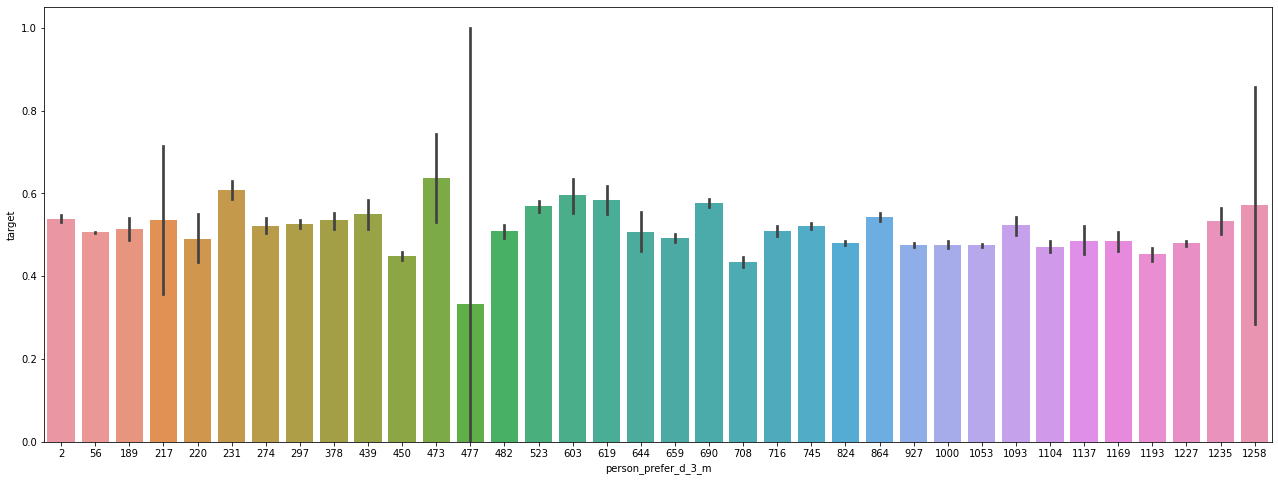

In [82]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'person_prefer_d_3_m', y = 'target')

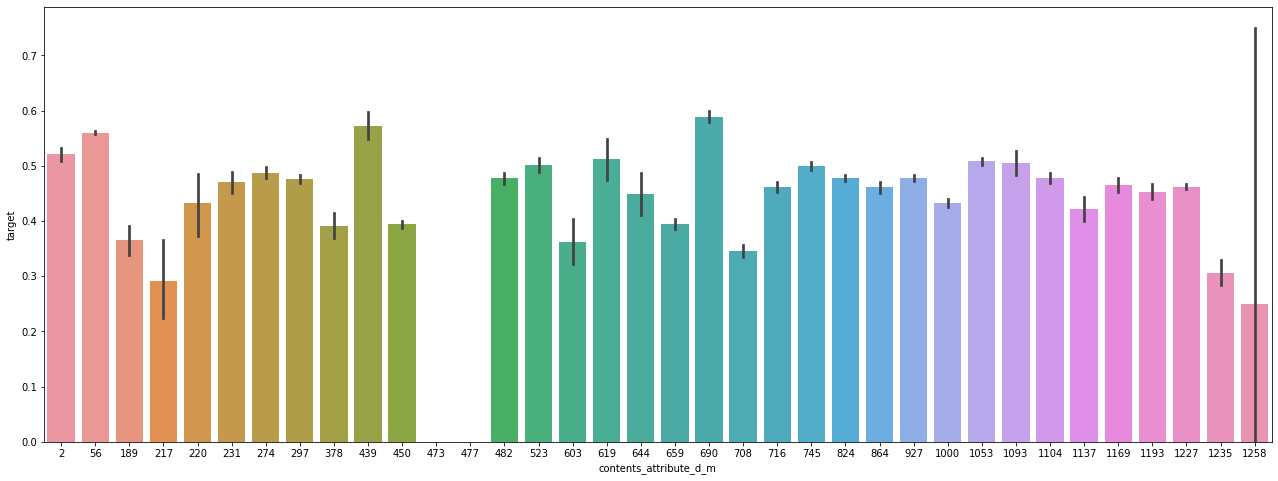

In [83]:
plt.figure(figsize = (22,8))
sns.barplot(data = train, x = 'contents_attribute_d_m', y = 'target')

In [73]:
print(train.groupby('person_prefer_d_1_l')['target'].mean())
print(train.groupby('person_prefer_d_2_l')['target'].mean())
print(train.groupby('person_prefer_d_3_l')['target'].mean())
print(train.groupby('contents_attribute_d_l')['target'].mean())

person_prefer_d_1_l
1       0.508990
216     0.536123
377     0.464309
482     0.501795
522     0.574074
618     0.524601
744     0.507016
864     0.526070
926     0.468142
1235    0.539576
1258    0.250000
Name: target, dtype: float64
person_prefer_d_2_l
1       0.509235
216     0.544193
377     0.474458
482     0.472611
522     0.577377
618     0.517062
744     0.500445
864     0.527040
926     0.472072
1235    0.508929
1258    0.400000
Name: target, dtype: float64
person_prefer_d_3_l
1       0.507786
216     0.534213
377     0.469124
482     0.508606
522     0.571342
618     0.514848
744     0.490788
864     0.543111
926     0.476214
1235    0.533827
1258    0.571429
Name: target, dtype: float64
contents_attribute_d_l
1       0.556890
216     0.478011
377     0.404538
482     0.477222
522     0.491358
618     0.459481
744     0.485361
864     0.460990
926     0.470818
1235    0.306087
1258    0.250000
Name: target, dtype: float64


In [71]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,352,347,346,2006
501947,501947,True,True,False,True,False,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,155,138,99,2006
501948,501948,True,True,True,True,False,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,437,417,407,2006
501949,501949,True,False,False,True,False,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,659,652,651,2006


### contents_open_dt

In [90]:
train['contents_open_dt'].dt.hour

AttributeError: ignored